# ========== Real Estate Price Predictor ==========
#### [ Machine Learning Project ]

A. Title: Boston Housing Data

B. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

C. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

D. Relevant Information:

   Concerns housing values in suburbs of Boston.

E. Number of Instances: 506

F. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

G. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollers
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000's dollers

H. Missing Attribute Values:  None.

## 1. Importing Modules:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## 2. Loading and Visualizing the Data:

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()  # For checking if there is any NULL value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()   # To get a visual of overall data by values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


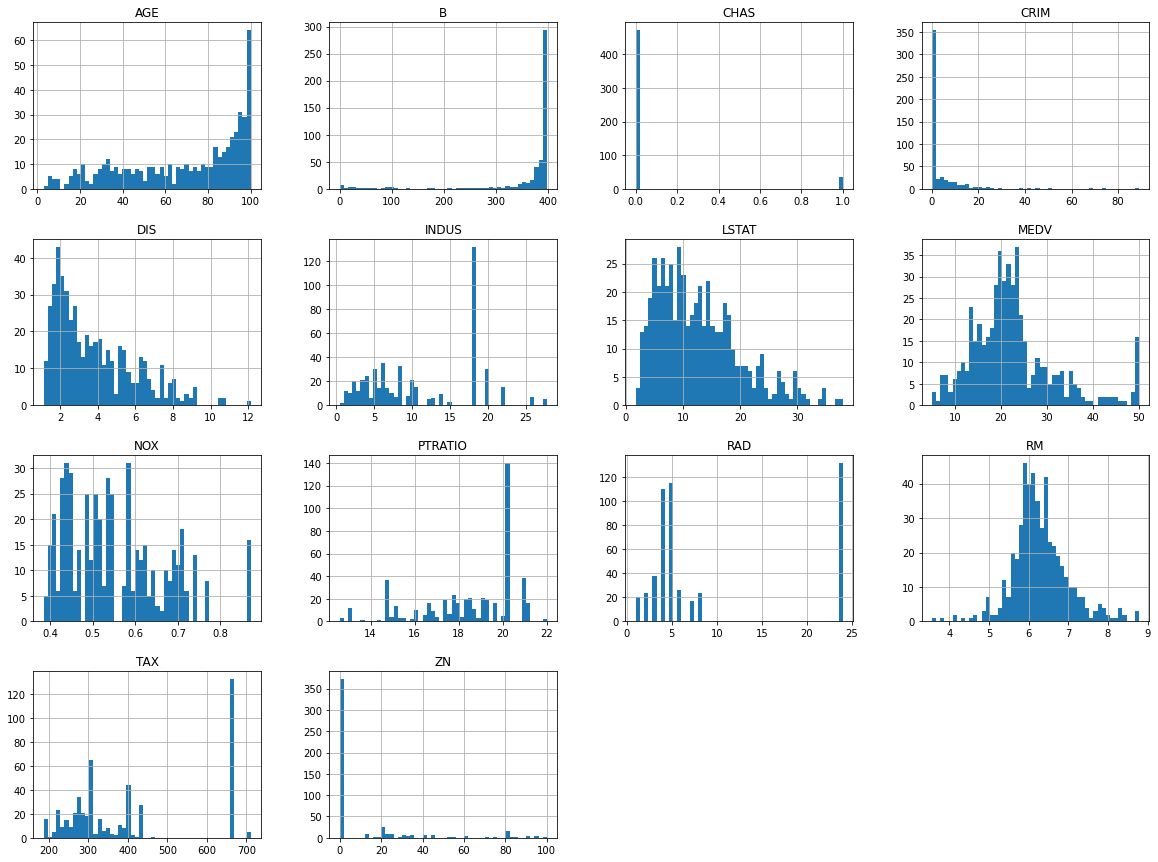

In [6]:
# To get a visual of overall data by Histograms.
housing.hist(bins=50, figsize=(20,15))
plt.show()

## 3. Train-Test Split:
#### Splitting the data to Train Data & Test Data

In [7]:
# splitting function:
def split_train_test(data, train_to_test_ratio):
    np.random.seed(42)  # For fixing the random generated values to prevent the model from overfitting.
    shuffled = np.random.permutation(len(data))   # generating random values within the range of length of the data
    train_set_size = int(len(data) * train_to_test_ratio)   # setting up tarin set data size
    train_indices = shuffled[:train_set_size]           # Setting the indices for train data
    test_indices = shuffled[train_set_size:]            # Setting the indices for test data
    return data.iloc[train_indices], data.iloc[test_indices]   # returning Train & Test data

In [8]:
train_set, test_set = split_train_test(housing, 0.8)

In [9]:
print(f"Rows in Train set: {len(train_set)}\nRows in Test set: {len(test_set)}")

Rows in Train set: 404
Rows in Test set: 102


### ( SHORT FORM for Train-Test Split )

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, train_size=0.8, random_state=42)

In [11]:
print(f"Rows in Train set: {len(train_set)}\nRows in Test set: {len(test_set)}")

Rows in Train set: 404
Rows in Test set: 102


### Stratigically Splitting Train-Test set:
It splits the dataset on equal ratio of the provided variable.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=42)  # n_splits = 1 means it will only iterate(i.e- split) for 1 time only.

for train_index, test_index in sss.split(housing, housing['CHAS']):   # housing['CHAS'] - provided variable.
    #print(train_index,test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
#strat_train_set
#strat_test_set

In [14]:
#strat_train_set['CHAS'].value_counts()
#strat_test_set['CHAS'].value_counts()

In [15]:
#print(376/28)
#print(95/7)

## 4. Looking for Correlations:
It is used to find out the important attributes/features for the model.

In [16]:
corr_matrix = strat_train_set.corr()
#corr_matrix

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)
# Positive value means MEDV(price) is directly proportional to the corresponding value.
# Negative value means MEDV(price) is inversely proportional to the corresponding value.

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

## 5. Removing Faulty data points:

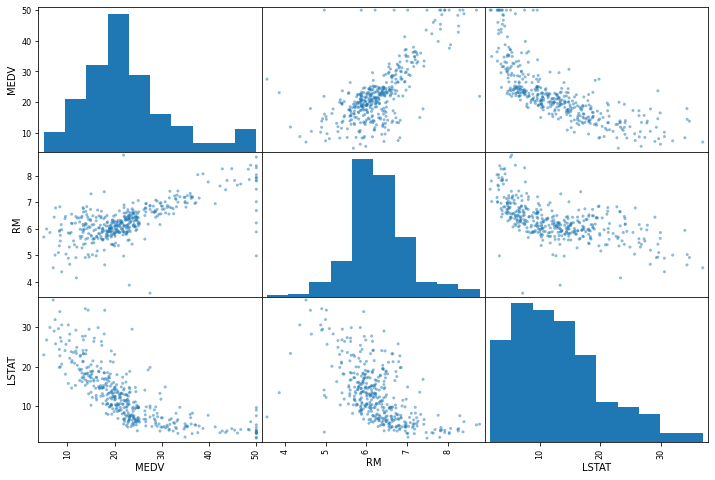

In [18]:
# Just for visualizing.
from pandas.plotting import scatter_matrix
scatter_matrix(strat_train_set[['MEDV', 'RM', 'LSTAT']], figsize=(12,8))
plt.show()

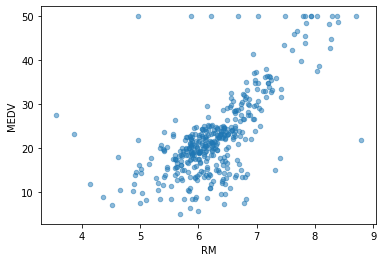

In [19]:
strat_train_set.plot(kind="scatter", x="RM", y="MEDV", alpha=0.5)
plt.show()
# From the plot we can see the MEDV = 50 values is inconsistent.
# Because at RM < 5, MEDV = 50 also at RM > 8, MEDV = 50 That means there is a capping at value 50. (capping= data above a certain value is not present.)
# So those values can be removed as they will have a bad effect in the ML model.

## 6. Handling Missing Attributes:
To take care of missing attributes we have three options:
1. Get rid of the missing data points. (valid for a few missing values as they will not have a great impact on the overall data)
2. Get rid of the whole attribute(column). (valid for a attribute that has a low correlation with the label attribute(here 'MEDV') or isn't that important.)
3. Set the NULL values to some value(0, mean or median). (Best Solution)

In [20]:
strat_train_set.shape

(404, 14)

In [21]:
strat_train_set.info()
# RM column has missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [22]:
# Option 1:
new_data = strat_train_set.dropna(subset=["RM"])
new_data.shape

(399, 14)

In [23]:
# Option 2:
new_data = strat_train_set.drop("RM", axis=1)
new_data.shape

(404, 13)

In [24]:
# Option 3:
median = strat_train_set["RM"].median()
new_data = strat_train_set.copy()
new_data["RM"].fillna(median, inplace=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


### (SHORT FORM for Handling Missing Values)

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")    # Computes median on all columns
imputer.fit(strat_train_set)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01, 2.11500e+01])

In [27]:
temp = imputer.transform(strat_train_set)
# It automatically removes the NULL values with the median of the corresponding column.
# Returns a numpy array. So-
# Creating a new and final dataframe for training. 
strat_train_set_tr = pd.DataFrame(temp, columns=strat_train_set.columns)

In [28]:
strat_train_set_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


-------------------------------------------------------------------
## Scikit-learn Design
Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling
Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## 7. Creating a Pipeline:
It will run all the methods defined inside it one by one on the dataset.
Then returns the final data set.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # ...... we can add methods as many as we want.
    ('std_scaler', StandardScaler())
])

In [30]:
# fit_transform will first fit and then tranform the data passed as its argument.
# It will return a numpy array NOT a dataframe.
strat_train_set_pipe_tr = my_pipeline.fit_transform(strat_train_set)

In [31]:
strat_train_set_pipe_tr

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.06501087],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739,  0.21235476],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158, -0.61974213],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303,  2.27126115],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575, -0.89710776],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681,  0.08433985]])

## 8. Selecting The Best Model:

### (i) Preparing features and labels:

In [32]:
# Step 1:
    # Train Set: strat_train_set
    # Test Set: strat_test_set
    
# Step 2:
    # features:
    # labels:
features = strat_train_set.drop('MEDV', axis=1)
labels = strat_train_set['MEDV']

# Step 3:
    # Prepare features through Pipeline by fitting + transforming:
features_prepared = my_pipeline.fit_transform(features)

# Final Output:
    # features_prepared
    # labels

### (ii) Selecting the Model:

In [33]:
# Import model:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()

### (iii) Train the Model:

In [34]:
# Train the model:
model.fit(features_prepared, labels)

RandomForestRegressor()

## 9. Evaluating the Selected Model:
##### Method 1: Root Mean Square Error
##### Method 2: Cross Validation

In [35]:
class Evaluate:
    def __init__(self, model, features, labels):
        self.model = model
        self.features = features
        self.labels = labels
    
    def rmse(self):
        from sklearn.metrics import mean_squared_error
        prediction = self.model.predict(self.features)
        mse = mean_squared_error(self.labels, prediction)
        rmse = np.sqrt(mse)
        print("-- RMSE --")
        print(f"Root Mean Square Error is: {rmse}")
    
    def cross_validation(self):
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(self.model, self.features, self.labels, scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores) # as scores is negative values
        print("-- Cross Validation --")
        print("Scores:", rmse_scores)
        print("Mean: ", rmse_scores.mean())
        print("Standard deviation: ", rmse_scores.std())

### Evaluating on the Training data:

In [36]:
e = Evaluate(model, features_prepared, labels)
e.rmse()

-- RMSE --
Root Mean Square Error is: 1.1634295517057218


In [37]:
e.cross_validation()

-- Cross Validation --
Scores: [2.77806021 2.72924632 4.37720047 2.53091732 3.3315517  2.6303775
 4.76386489 3.33641865 3.34755642 3.19442273]
Mean:  3.301961620269954
Standard deviation:  0.7040608050208857


## 10. Saving the Model:

In [38]:
from joblib import dump, load
dump(model, 'model.joblib') 

['model.joblib']

## 11. Testing the Model on the Test data:

In [39]:
test_features = strat_test_set.drop('MEDV', axis=1)
test_labels = strat_test_set['MEDV']
test_features_prepared = my_pipeline.transform(test_features)

e_test = Evaluate(model, test_features_prepared, test_labels)

e_test.rmse()
e_test.cross_validation()

-- RMSE --
Root Mean Square Error is: 2.913198895359115
-- Cross Validation --
Scores: [3.98975293 3.84069143 5.17992018 4.95200742 2.66225975 5.46284606
 5.22871137 4.25862296 3.186089   4.29534729]
Mean:  4.30562483907989
Standard deviation:  0.8743977780101989


## 12. Using the Model:

In [40]:
from joblib import dump, load
import numpy as np
model = load('model.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([23.578])

In [41]:
#strat_test_set

In [44]:
from joblib import dump, load
import numpy as np
model = load('model.joblib') 
features = pd.DataFrame(np.array([[0.07165, 0.0, 25.65, 0, 0.581, 6.004, 84.1, 2.1974, 2, 188, 19.1, 377.67, 14.27]]))
features = my_pipeline.transform(features)
model.predict(features)

array([20.883])

In [43]:
# 0.07165, 0.0, 25.65, 0, 0.581, 6.004, 84.1, 2.1974, 2, 188, 19.1, 377.67, 14.27, 20.3